Importation of panda and numpy, then displaying the top 5 things on the dataset, along with other general information about the dataset (shape, column names)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
df.shape

(12294, 7)

In [3]:
print(df.columns)


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


Set the prediction target as rating and seperate it from the other features of this dataset

In [4]:
model_features = df.columns.drop('rating')
model_target = 'rating'

Seperate the model_features data into numerical data and catigorical data

In [5]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)




Numerical columns: Index(['anime_id', 'members'], dtype='object')

Categorical columns: Index(['name', 'genre', 'type', 'episodes'], dtype='object')


Get a visual plot of several of the catigorical and numerical features to help us better visual the distribution of the dataset.

type


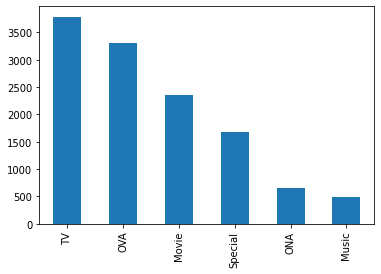

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
for c in categorical_features_all:
    if len(df[c].value_counts()) <= 10:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

anime_id


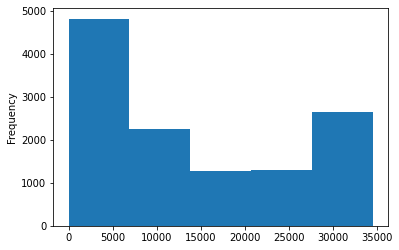

members


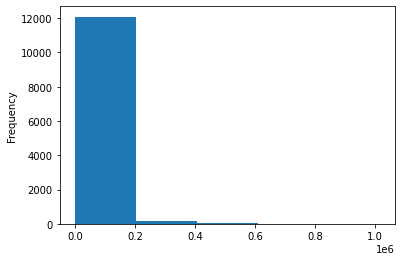

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

<AxesSubplot:>

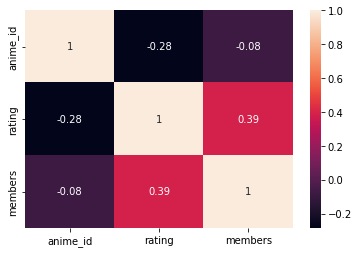

In [8]:
import seaborn as sn
cor = df.corr()
sn.heatmap(cor, annot = True)

Import everything needed for the pipeline

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer